# Analyse the natural groups in the data

I'm going to  run t-SNE vidualisation over session_data_full.csv

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import seaborn as sns



import os
import core.constants as c
from core.utils import save_df_as_table_image

session_data_full = pd.read_csv(c.RICKD_SESSION_DATA_FULL_CLEANED_FILE)
session_data_full

id  sub_id           datestring  \
0     100433_20101005t132240  100433  2010-10-05 13:22:40   
1     100434_20101117t132240  100434  2010-11-17 13:22:40   
2     100537_20120703t102550  100537  2012-07-03 10:25:50   
3     100560_20120717t103748  100560  2012-07-17 10:37:48   
4     101481_20120717t105021  101481  2012-07-17 10:50:21   
...                      ...     ...                  ...   
1827  200986_20150312t143944  200986  2015-03-12 14:39:44   
1828  200987_20150312t160840  200987  2015-03-12 16:08:40   
1829  201100_20150409t155915  201100  2015-04-09 15:59:15   
1830  201101_20150413t143152  201101  2015-04-13 14:31:52   
1831  201099_20150414t092041  201099  2015-04-14 09:20:41   

                  filename   speed_r   age  Height  Weight  Gender  \
0     20101005t132240.json  1.610861  53.0     NaN     NaN     NaN   
1     20101117t132240.json  2.237294  51.0     NaN     NaN  female   
2     20120703t102550.json  2.127441   NaN   173.1    67.6  female   
3     20120717t103748.json  2.657365  33.0   179.3    83.0  female   
4     20120717t105021.json  2.625088  32.0   176.3    58.6  female   
...                    ...       ...   ...     ...     ...     ...   
1827  20150312t143944.json  4.876998  20.0   174.0    56.8  female   
1828  20150312t160840.json  2.765022  50.0   164.0    60.0  female   
1829  20150409t155915.json  2.790966  52.0   170.0    80.0    male   
1830  20150413t143152.json  2.828602  21.0   162.0    65.5    male   
1831  20150414t092041.json  2.514918  57.0   165.5    74.1  female   

     DominantLeg  ... injury2_code  \
0            NaN  ...    no_injury   
1            NaN  ...    no_injury   
2          right  ...    no_injury   
3          right  ...    no_injury   
4            NaN  ...    no_injury   
...          ...  ...          ...   
1827       right  ...    no_injury   
1828       right  ...     itb_synd   
1829       right  ...    liga_spra   
1830       right  ...    no_injury   
1831       right  ...    no_injury   

                                            injury_desc  \
0     General sensation of discomfort  without speci...   
1     Breakdown and gradual loss of spinal disc cush...   
2     General sensation of discomfort  without speci...   
3                         No injury has been diagnosed.   
4                         No injury has been diagnosed.   
...                                                 ...   
1827                      No injury has been diagnosed.   
1828  Misalignment or imbalance of pelvic bones caus...   
1829  Muscle fibers stretched or torn due to excessi...   
1830                      No injury has been diagnosed.   
1831  General sensation of discomfort  without speci...   

                                           injury2_desc          injury_name  \
0                         No injury has been diagnosed.                 pain   
1                         No injury has been diagnosed.    disc degeneration   
2                         No injury has been diagnosed.                 pain   
3                         No injury has been diagnosed.            no injury   
4                         No injury has been diagnosed.            no injury   
...                                                 ...                  ...   
1827                      No injury has been diagnosed.            no injury   
1828  Painful friction of iliotibial band rubbing ov...  pelvic malalignment   
1829  Stretching or tearing of ligaments due to exce...        muscle strain   
1830                      No injury has been diagnosed.            no injury   
1831                      No injury has been diagnosed.                 pain   

         injury2_name  injured_joint_code  injured_joint2_code  \
0           no injury                knee            no_injury   
1           no injury        lumbar_spine            no_injury   
2           no injury          hip_pelvis            no_injury   
3           no injury           no_injury            no_injur

In [2]:
# Create is_injured variable as the inverse of has_no_injury
session_data_full['is_injured'] = (~session_data_full["has_no_injury"]).astype(int)

# Split predictor and dependant variables
identifier_cols = [
    "id",
    "sub_id",
    "datestring",
    "filename"
]
dependant_variable_columns = [
    "injury_severity_code",
    "injury_severity_value",
    "injury_code",
    "injury2_code",
    "injury_desc",
    "injury2_desc",
    "injury_name",
    "injury2_name",
    "injured_joint_code",
    "injured_joint2_code",
    "injured_side_code",
    "injured_side2_code",
    "is_injured"
]
# Note, commented out column have been removed because they are not clean and
# do not add value in this state (i.e. RaceTime needs to be combined into a coefficient of performance)
predictor_columns = [
    "speed_r",
    "age",
    "Height",
    "Weight",
    "Gender",
    "DominantLeg",
    # "Activities",
    "Level",
    "YrsRunning",
    # "RaceDistance",
    # "RaceTimeHrs",
    # "RaceTimeMins",
    # "RaceTimeSecs",
    # "YrPR",
    "NumRaces",
    "l_step_width",
    "l_stride_rate",
    "l_stride_length",
    "l_swing_time",
    "l_stance_time",
    "l_pelvis_peak_drop_angle",
    "l_pelvis_drop_excursion",
    "l_ankle_df_peak_angle",
    "l_ankle_eve_peak_angle",
    "l_ankle_eve_percent_stance",
    "l_ankle_eve_excursion",
    "l_ankle_rot_peak_angle",
    "l_ankle_rot_excursion",
    "l_knee_flex_peak_angle",
    "l_knee_add_peak_angle",
    "l_knee_add_excursion",
    "l_knee_abd_peak_angle",
    "l_knee_abd_excursion",
    "l_knee_rot_peak_angle",
    "l_knee_rot_excursion",
    "l_hip_ext_peak_angle",
    "l_hip_add_peak_angle",
    "l_hip_add_excursion",
    "l_hip_rot_peak_angle",
    "l_hip_rot_excursion",
    "l_foot_prog_angle",
    "l_foot_ang_at_hs",
    "l_mhw_exc_from_to",
    "l_ankle_eve_peak_vel",
    "l_ankle_rot_peak_vel",
    "l_knee_abd_peak_vel",
    "l_knee_add_peak_vel",
    "l_hip_abd_peak_vel",
    "l_knee_rot_peak_vel",
    "l_hip_rot_peak_vel",
    "l_pronation_onset",
    "l_pronation_offset",
    "l_peak_hip_add_velocity",
    "l_peak_pelvic_drop_velocity",
    "l_vertical_oscillation",
    "r_step_width",
    "r_stride_rate",
    "r_stride_length",
    "r_swing_time",
    "r_stance_time",
    "r_pelvis_peak_drop_angle",
    "r_pelvis_drop_excursion",
    "r_ankle_df_peak_angle",
    "r_ankle_eve_peak_angle",
    "r_ankle_eve_percent_stance",
    "r_ankle_eve_excursion",
    "r_ankle_rot_peak_angle",
    "r_ankle_rot_excursion",
    "r_knee_flex_peak_angle",
    "r_knee_add_peak_angle",
    "r_knee_add_excursion",
    "r_knee_abd_peak_angle",
    "r_knee_abd_excursion",
    "r_knee_rot_peak_angle",
    "r_knee_rot_excursion",
    "r_hip_ext_peak_angle",
    "r_hip_add_peak_angle",
    "r_hip_add_excursion",
    "r_hip_rot_peak_angle",
    "r_hip_rot_excursion",
    "r_foot_prog_angle",
    "r_foot_ang_at_hs",
    "r_mhw_exc_from_to",
    "r_ankle_eve_peak_vel",
    "r_ankle_rot_peak_vel",
    "r_knee_abd_peak_vel",
    "r_knee_add_peak_vel",
    "r_hip_abd_peak_vel",
    "r_knee_rot_peak_vel",
    "r_hip_rot_peak_vel",
    "r_pronation_onset",
    "r_pronation_offset",
    "r_peak_hip_add_velocity",
    "r_peak_pelvic_drop_velocity",
    "r_vertical_oscillation",
]

Y = session_data_full.set_index("id")[dependant_variable_columns].copy()
X = session_data_full.set_index("id")[predictor_columns].copy()

print("X")
display(X.head())

print("Y")
display(Y.head())


X


speed_r   age  Height  Weight  Gender DominantLeg  \
id                                                                           
100433_20101005t132240  1.610861  53.0     NaN     NaN     NaN         NaN   
100434_20101117t132240  2.237294  51.0     NaN     NaN  female         NaN   
100537_20120703t102550  2.127441   NaN   173.1    67.6  female       right   
100560_20120717t103748  2.657365  33.0   179.3    83.0  female       right   
101481_20120717t105021  2.625088  32.0   176.3    58.6  female         NaN   

                               Level  YrsRunning  NumRaces  l_step_width  ...  \
id                                                                        ...   
100433_20101005t132240  recreational        13.0       NaN      0.048521  ...   
100434_20101117t132240  recreational        20.0       NaN     -0.002092  ...   
100537_20120703t102550  recreational         2.0       NaN      0.057484  ...   
100560_20120717t103748  recreational         NaN       NaN      0.081206  ...   
101481_20120717t105021           NaN         NaN       NaN      0.062199  ...   

                        r_knee_abd_peak_vel  r_knee_add_peak_vel  \
id                                                                 
100433_20101005t132240           -71.422163            49.606277   
100434_20101117t132240           -54.774824            60.136863   
100537_20120703t102550          -115.248831            48.898541   
100560_20120717t103748          -129.419031            74.009251   
101481_20120717t105021          -137.461770            75.703882   

                        r_hip_abd_peak_vel  r_knee_rot_peak_vel  \
id                                                                
100433_20101005t132240          -17.620105           121.078813   
100434_20101117t132240          -42.544797           292.718838   
100537_20120703t102550          -55.286282           318.798151   
100560_20120717t103748         -109.157604           349.195418   
101481_20120717t105021          -24.314138           226.067684   

                        r_hip_rot_peak_vel  r_pronation_onset  \
id                                                              
100433_20101005t132240           95.598653                 17   
100434_20101117t132240           17.255165                  8   
100537_20120703t102550          201.561725                 13   
100560_20120717t103748           84.881142                 20   
101481_20120717t105021           93.835737                 17   

                        r_pronation_offset  r_peak_hip_add_velocity  \
id                                                                    
100433_20101005t132240                  57                59.323001   
100434_20101117t132240                  53               183.573751   
100537_20120703t102550                  56               257.430836   
100560_20120717t103748                  55               320.445059   
101481_20120717t105021                  57               169.271213   

                        r_peak_pelvic_drop_velocity  r_vertical_oscillation  
id                                                                           
100433_20101005t132240                   -75.058744               51.466247  
100434_20101117t132240                   -96.178927               62.307667  
100537_20120703t102550                   -62.804925               81.753809  
100560_20120717t103748                  -141.687354              111.686204  
101481_20120717t105021                   -49.506248               99.045820  

[5 rows x 89 columns]

Y


injury_severity_code  injury_severity_value  \
id                                                                   
100433_20101005t132240     volume_intensity                    2.0   
100434_20101117t132240     volume_intensity                    2.0   
100537_20120703t102550    missed_2_workouts                    3.0   
100560_20120717t103748            no_injury                    0.0   
101481_20120717t105021            no_injury                    0.0   

                       injury_code injury2_code  \
id                                                
100433_20101005t132240        pain    no_injury   
100434_20101117t132240   disc_dege    no_injury   
100537_20120703t102550        pain    no_injury   
100560_20120717t103748   no_injury    no_injury   
101481_20120717t105021   no_injury    no_injury   

                                                              injury_desc  \
id                                                                          
100433_20101005t132240  General sensation of discomfort  without speci...   
100434_20101117t132240  Breakdown and gradual loss of spinal disc cush...   
100537_20120703t102550  General sensation of discomfort  without speci...   
100560_20120717t103748                      No injury has been diagnosed.   
101481_20120717t105021                      No injury has been diagnosed.   

                                         injury2_desc        injury_name  \
id                                                                         
100433_20101005t132240  No injury has been diagnosed.               pain   
100434_20101117t132240  No injury has been diagnosed.  disc degeneration   
100537_20120703t102550  No injury has been diagnosed.               pain   
100560_20120717t103748  No injury has been diagnosed.          no injury   
101481_20120717t105021  No injury has been diagnosed.          no injury   

                       injury2_name injured_joint_code injured_joint2_code  \
id                                                                           
100433_20101005t132240    no injury               knee           no_injury   
100434_20101117t132240    no injury       lumbar_spine           no_injury   
100537_20120703t102550    no injury         hip_pelvis           no_injury   
100560_20120717t103748    no injury          no_injury           no_injury   
101481_20120717t105021    no injury          no_injury           no_injury   

                       injured_side_code injured_side2_code  is_injured  
id                                                                       
100433_20101005t132240             right              right           1  
100434_20101117t132240         bilateral              right           1  
100537_20120703t102550             right              right           1  
100560_20120717t103748             right              right           0  
101481_20120717t105021         no_injury          no_injury           0

In [3]:
# Prepare the dataset for Machine Learning algorithms:
feature_numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
feature_categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

if len(X.columns) != (len(feature_numerical_columns) + len(feature_categorical_columns)):
       raise TypeError("You have missed a variable! Check the types")

print("Categorical features:")
print(feature_categorical_columns)
print("Numerical features:")
print(feature_numerical_columns)

Categorical features:
['Gender', 'DominantLeg', 'Level']
Numerical features:
['speed_r', 'age', 'Height', 'Weight', 'YrsRunning', 'NumRaces', 'l_step_width', 'l_stride_rate', 'l_stride_length', 'l_swing_time', 'l_stance_time', 'l_pelvis_peak_drop_angle', 'l_pelvis_drop_excursion', 'l_ankle_df_peak_angle', 'l_ankle_eve_peak_angle', 'l_ankle_eve_percent_stance', 'l_ankle_eve_excursion', 'l_ankle_rot_peak_angle', 'l_ankle_rot_excursion', 'l_knee_flex_peak_angle', 'l_knee_add_peak_angle', 'l_knee_add_excursion', 'l_knee_abd_peak_angle', 'l_knee_abd_excursion', 'l_knee_rot_peak_angle', 'l_knee_rot_excursion', 'l_hip_ext_peak_angle', 'l_hip_add_peak_angle', 'l_hip_add_excursion', 'l_hip_rot_peak_angle', 'l_hip_rot_excursion', 'l_foot_prog_angle', 'l_foot_ang_at_hs', 'l_mhw_exc_from_to', 'l_ankle_eve_peak_vel', 'l_ankle_rot_peak_vel', 'l_knee_abd_peak_vel', 'l_knee_add_peak_vel', 'l_hip_abd_peak_vel', 'l_knee_rot_peak_vel', 'l_hip_rot_peak_vel', 'l_pronation_onset', 'l_pronation_offset', 'l_p

In [4]:
categorical_data = pd.get_dummies(X[feature_categorical_columns].fillna("unknown"))
categorical_data.columns

Index(['Gender_female', 'Gender_male', 'Gender_unknown',
       'DominantLeg_ambidextrous', 'DominantLeg_left', 'DominantLeg_right',
       'DominantLeg_unknown', 'Level_competitive', 'Level_recreational',
       'Level_unknown'],
      dtype='object')

In [5]:
# Create one-hot encoded features for categorical columns
categorical_data = pd.get_dummies(X[feature_categorical_columns].fillna("unknown"))

# We need to remove one category from each group to avoid multicollinearity - We will need to have this into consideration when interpreting the results.
# categorical_data.rename(columns={
#     "Gender_female": "gender_is_female",
#     "Gender_unknown": "gender_is_unknown",
#     "Level_competitive": "level_is_competitive",
#     }, inplace=True)
categorical_data.drop(columns=["Gender_unknown", "DominantLeg_unknown", "Level_unknown"], inplace=True)


# Combine numerical and one-hot encoded categorical features
X_numerical = X[feature_numerical_columns].fillna(0)
X_combined = pd.concat([X_numerical, categorical_data], axis=1)

print(f"Numerical features: {len(feature_numerical_columns)}")
print(f"Categorical features (after one-hot encoding): {categorical_data.shape[1]}")
print(f"Total features: {X_combined.shape[1]}")
# Display all columns of the dataframe
print("Columns:")
for i, col in enumerate(X_combined.columns, 1):
    print(f"{i:3d}. {col}")
display(X_combined)

Numerical features: 86
Categorical features (after one-hot encoding): 7
Total features: 93
Columns:
  1. speed_r
  2. age
  3. Height
  4. Weight
  5. YrsRunning
  6. NumRaces
  7. l_step_width
  8. l_stride_rate
  9. l_stride_length
 10. l_swing_time
 11. l_stance_time
 12. l_pelvis_peak_drop_angle
 13. l_pelvis_drop_excursion
 14. l_ankle_df_peak_angle
 15. l_ankle_eve_peak_angle
 16. l_ankle_eve_percent_stance
 17. l_ankle_eve_excursion
 18. l_ankle_rot_peak_angle
 19. l_ankle_rot_excursion
 20. l_knee_flex_peak_angle
 21. l_knee_add_peak_angle
 22. l_knee_add_excursion
 23. l_knee_abd_peak_angle
 24. l_knee_abd_excursion
 25. l_knee_rot_peak_angle
 26. l_knee_rot_excursion
 27. l_hip_ext_peak_angle
 28. l_hip_add_peak_angle
 29. l_hip_add_excursion
 30. l_hip_rot_peak_angle
 31. l_hip_rot_excursion
 32. l_foot_prog_angle
 33. l_foot_ang_at_hs
 34. l_mhw_exc_from_to
 35. l_ankle_eve_peak_vel
 36. l_ankle_rot_peak_vel
 37. l_knee_abd_peak_vel
 38. l_knee_add_peak_vel
 39. l_hip_abd_p

speed_r   age  Height  Weight  YrsRunning  NumRaces  \
id                                                                             
100433_20101005t132240  1.610861  53.0     0.0     0.0        13.0       0.0   
100434_20101117t132240  2.237294  51.0     0.0     0.0        20.0       0.0   
100537_20120703t102550  2.127441   0.0   173.1    67.6         2.0       0.0   
100560_20120717t103748  2.657365  33.0   179.3    83.0         0.0       0.0   
101481_20120717t105021  2.625088  32.0   176.3    58.6         0.0       0.0   
...                          ...   ...     ...     ...         ...       ...   
200986_20150312t143944  4.876998  20.0   174.0    56.8         8.0       0.0   
200987_20150312t160840  2.765022  50.0   164.0    60.0        16.0       1.0   
201100_20150409t155915  2.790966  52.0   170.0    80.0        30.0       0.0   
201101_20150413t143152  2.828602  21.0   162.0    65.5         0.0       0.0   
201099_20150414t092041  2.514918  57.0   165.5    74.1        30.0       2.0   

                        l_step_width  l_stride_rate  l_stride_length  \
id                                                                     
100433_20101005t132240      0.048521      83.333333         1.159820   
100434_20101117t132240     -0.002092      87.913267         1.526953   
100537_20120703t102550      0.057484      80.000000         1.595581   
100560_20120717t103748      0.081206      75.000000         2.125892   
101481_20120717t105021      0.062199      79.470199         1.981942   
...                              ...            ...              ...   
200986_20150312t143944      0.068630      83.916084         3.487054   
200987_20150312t160840      0.079469      88.888889         1.866390   
201100_20150409t155915      0.108809      76.433121         2.190908   
201101_20150413t143152      0.090986      88.235294         1.923449   
201099_20150414t092041      0.024072      78.947368         1.911338   

                        l_swing_time  ...  r_peak_hip_add_velocity  \
id                                    ...                            
100433_20101005t132240        0.4150  ...                59.323001   
100434_20101117t132240        0.4100  ...               183.573751   
100537_20120703t102550        0.4250  ...               257.430836   
100560_20120717t103748        0.3825  ...               320.445059   
101481_20120717t105021        0.4225  ...               169.271213   
...                              ...  ...                      ...   
200986_20150312t143944        0.4350  ...               113.244646   
200987_20150312t160840        0.4200  ...               171.902428   
201100_20150409t155915        0.4600  ...               203.683223   
201101_20150413t143152        0.4075  ...               168.473505   
201099_20150414t092041        0.4275  ...               232.654680   

                        r_peak_pelvic_drop_velocity  r_vertical_oscillation  \
id                                                                            
100433_20101005t132240                   -75.058744               51.466247   
100434_20101117t132240                   -96.178927               62.307667   
100537_20120703t102550                   -62.804925               81.753809   
100560_20120717t103748                  -141.687354              111.686204   
101481_20120717t105021                   -49.506248               99.045820   
...                                             ...                     ...   
200986_20150312t143944                   -35.757575               84.589713   
200987_20150312t160840                   -70.457833               68.524480   
201100_20150409t155915                  -120.697186               86.710600   
201101_20150413t143152                   -79.974041               67.343927   
201099_20150414t092041                  -103.766594               74.464189   

                        Gender_female  Gender_male  DominantLeg_ambidextrous  \
id                          

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

In [ ]:
# Apply t-SNE with same values as  5.1 attempt
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
tsne.kl_divergence_

Running t-SNE...


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


1.9496586322784424

In [8]:
# Grid search for best t-SNE perplexity (minimizing kl_divergence_)
perplexity_values = [5, 10, 20, 30, 40, 50, 60]
kl_divergences = []

print("Grid search for t-SNE perplexity:")
for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
    X_tsne_tmp = tsne.fit_transform(X_scaled)
    kl = tsne.kl_divergence_
    kl_divergences.append(kl)
    print(f"Perplexity: {perplexity:2d} | KL Divergence: {kl:.6f}")

best_idx = int(np.argmin(kl_divergences))
best_perplexity = perplexity_values[best_idx]
best_kl = kl_divergences[best_idx]
print(f"\nBest perplexity: {best_perplexity} (KL Divergence: {best_kl:.6f})")


Grid search for t-SNE perplexity:


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity:  5 | KL Divergence: 1.770735


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 10 | KL Divergence: 1.995729


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 20 | KL Divergence: 2.004773


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 30 | KL Divergence: 1.949659


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 40 | KL Divergence: 1.897426


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 50 | KL Divergence: 1.847830


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 60 | KL Divergence: 1.799169

Best perplexity: 5 (KL Divergence: 1.770735)


In [14]:
# Apply t-SNE with best perplexity vlaue.
print(f"Running t-SNE with best perplexity value. Value: {best_perplexity}")
tsne = TSNE(n_components=2, random_state=42, perplexity=best_perplexity, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
tsne.kl_divergence_

Running t-SNE with best perplexity value. Value: 5


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


1.7707351446151733

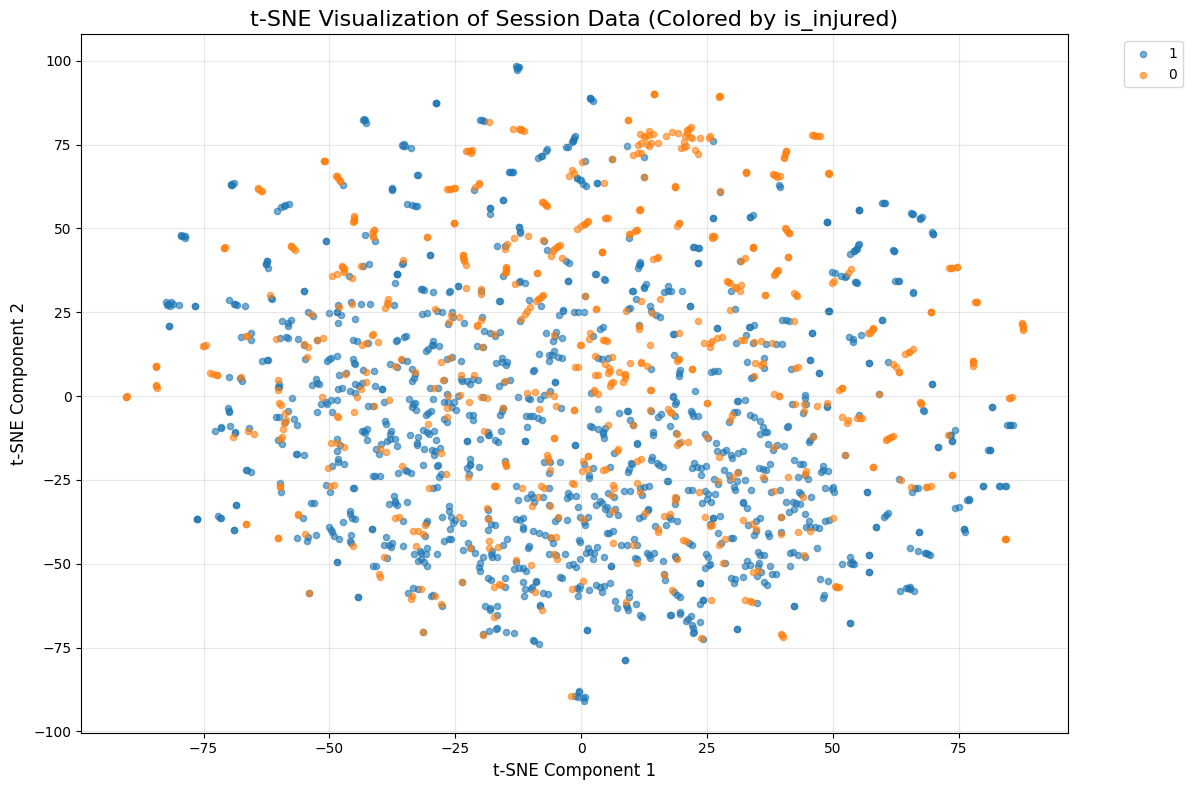

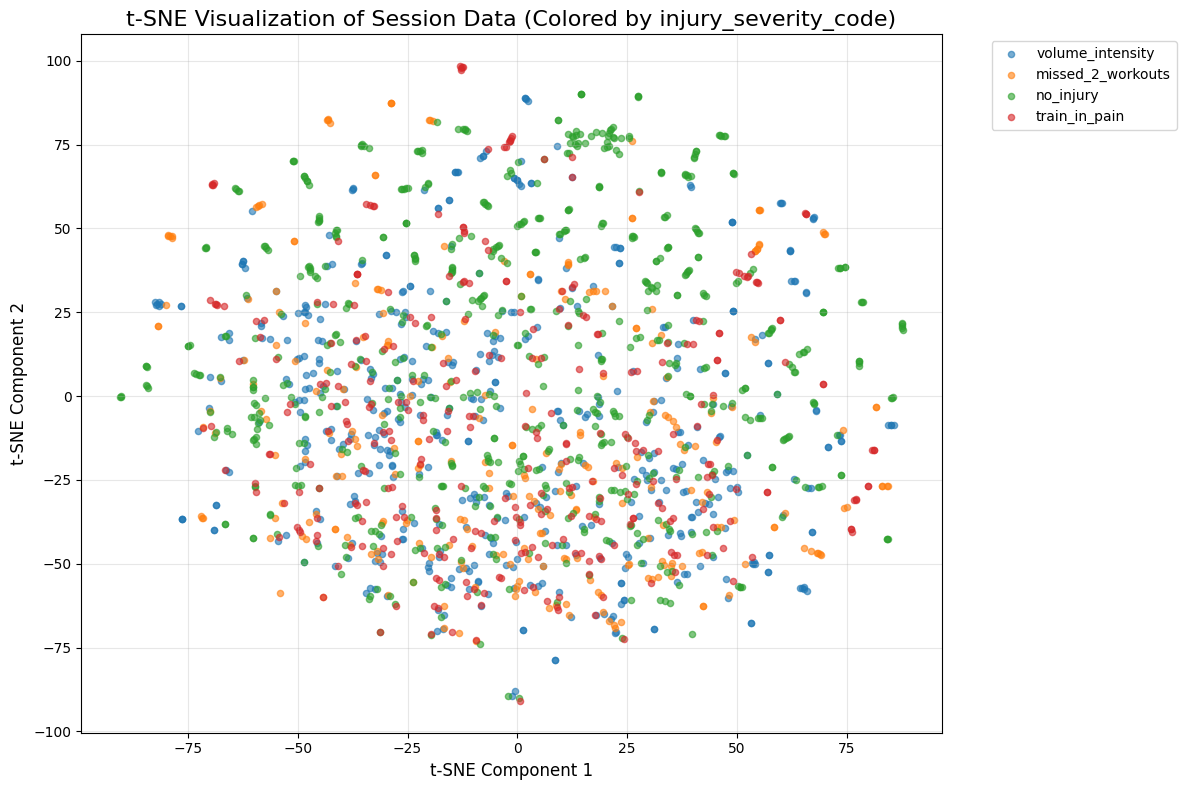

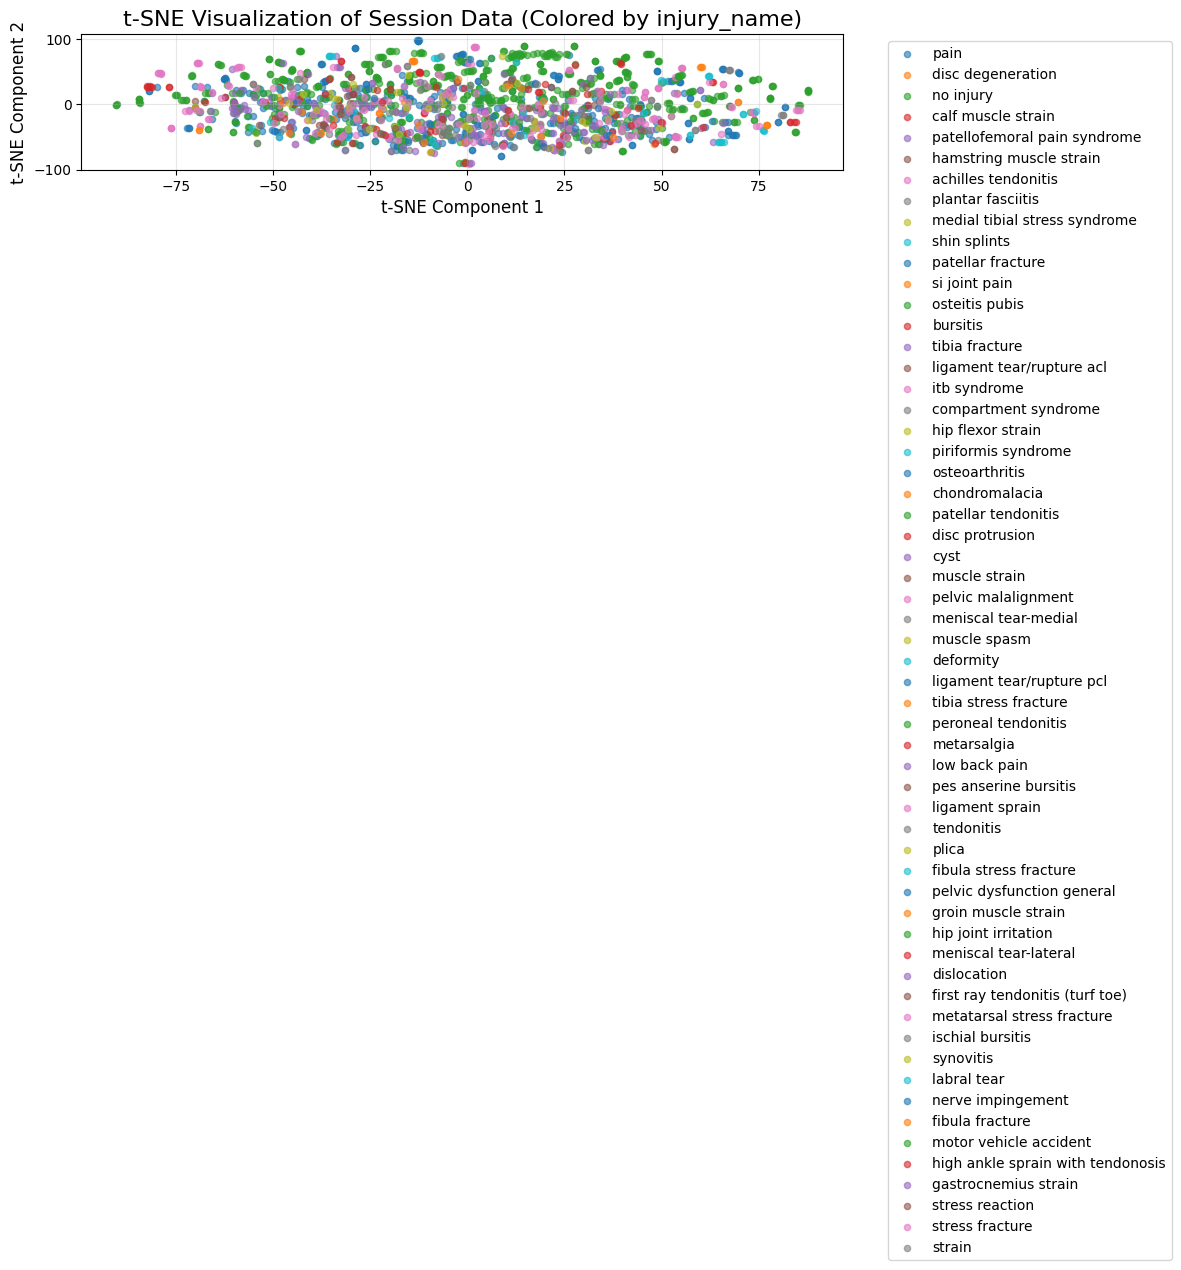

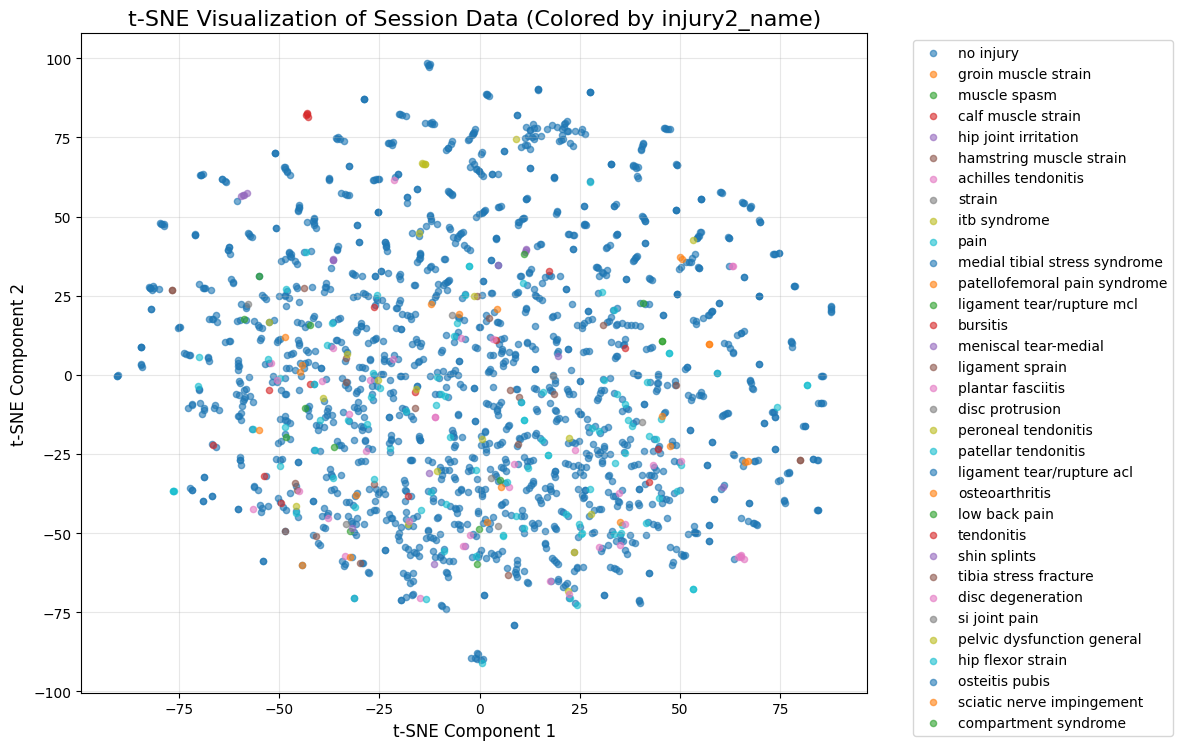

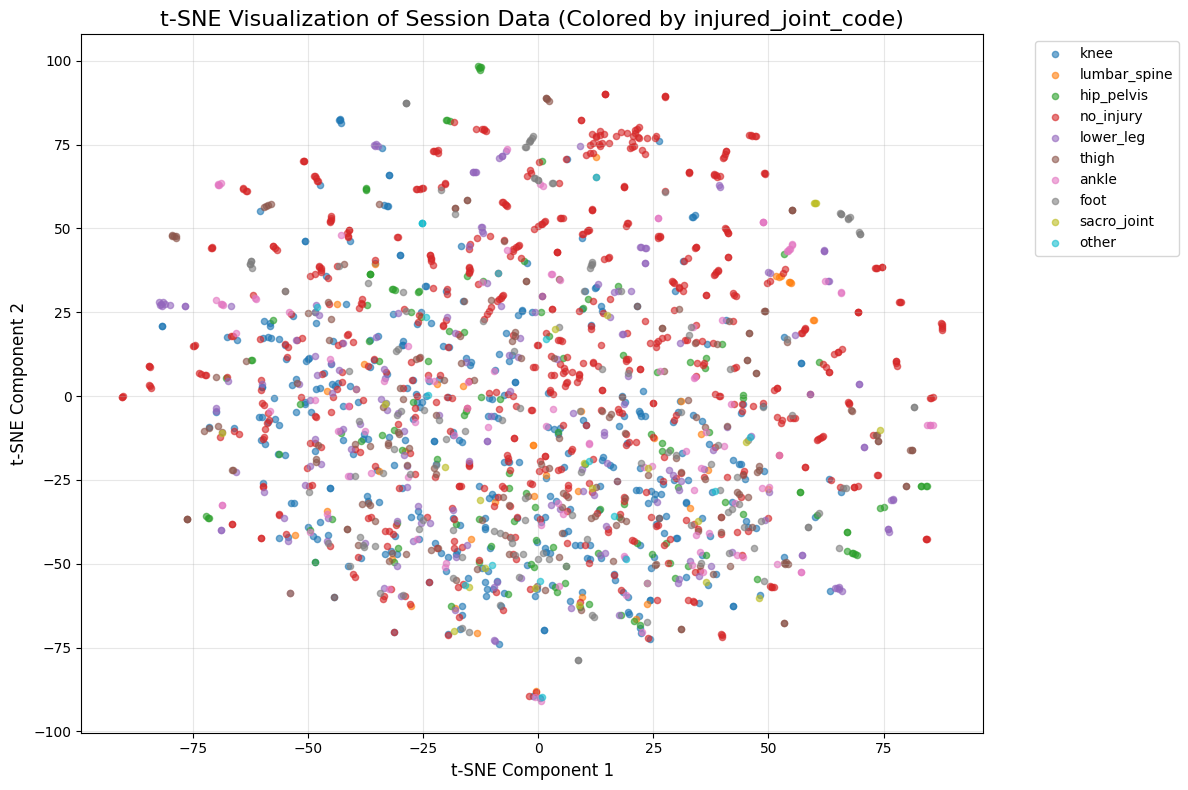

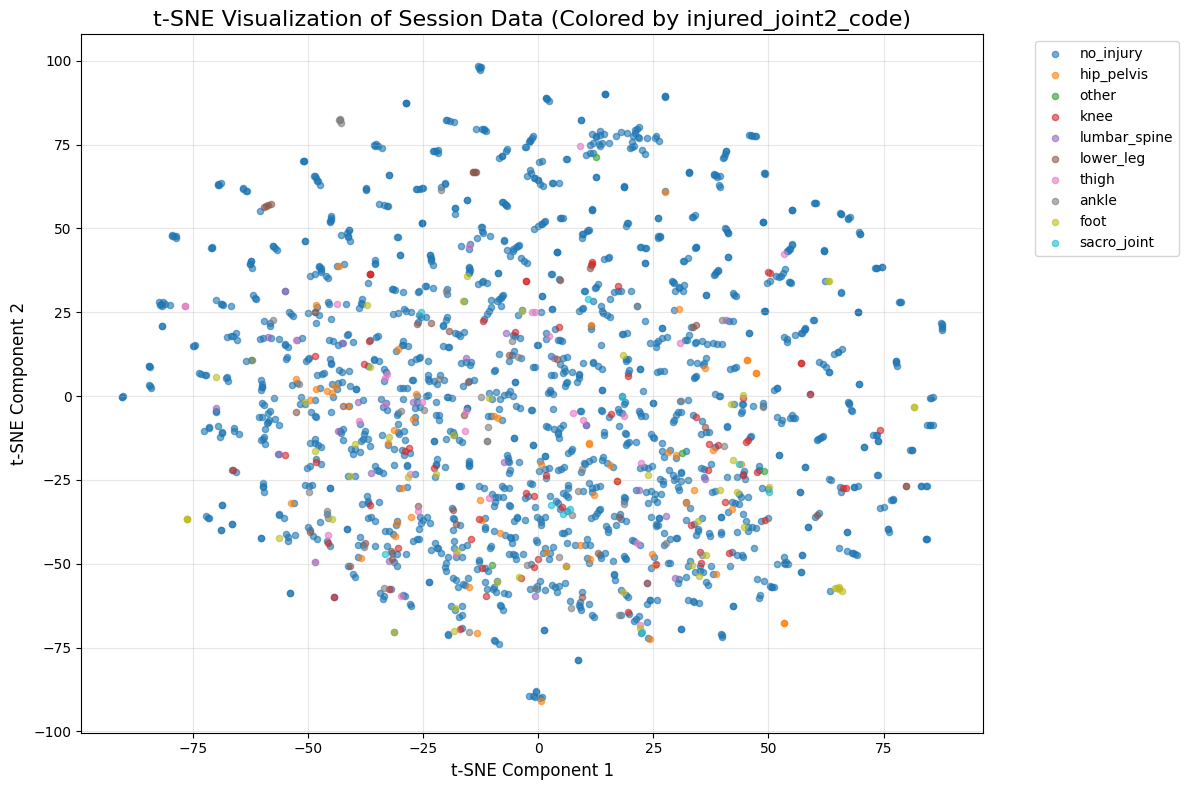

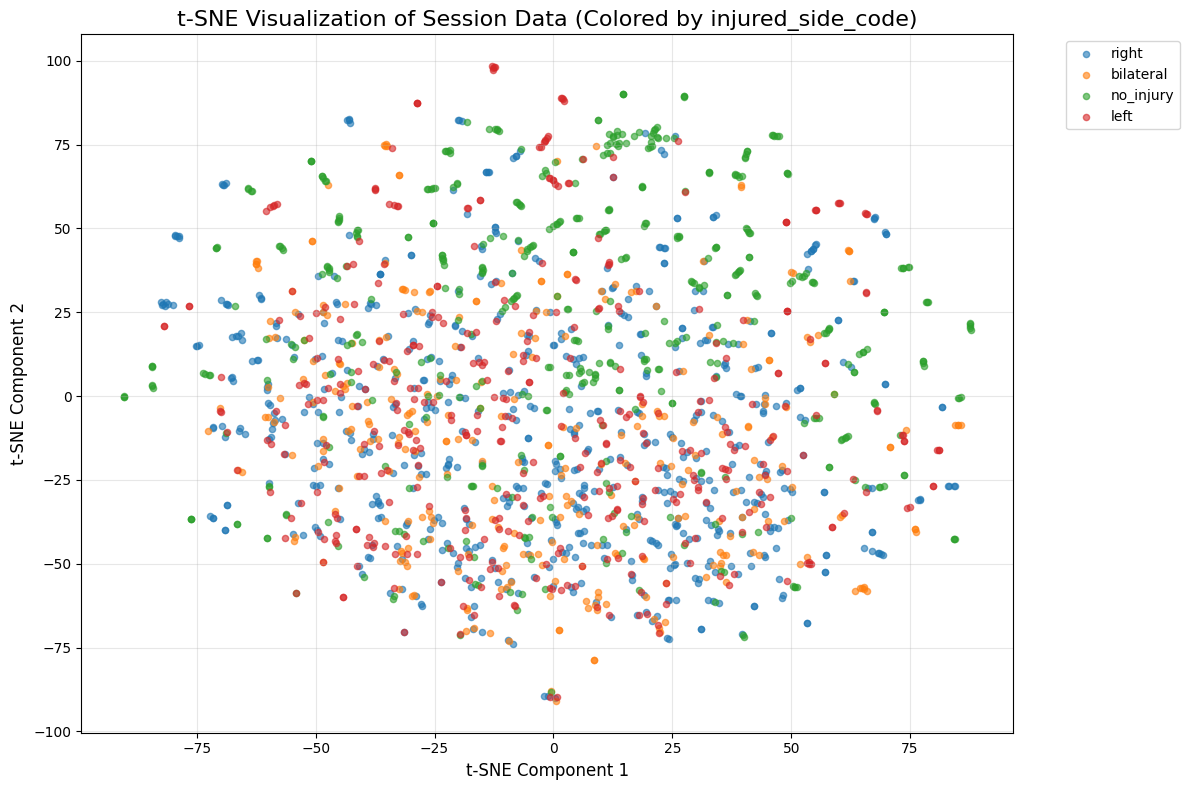

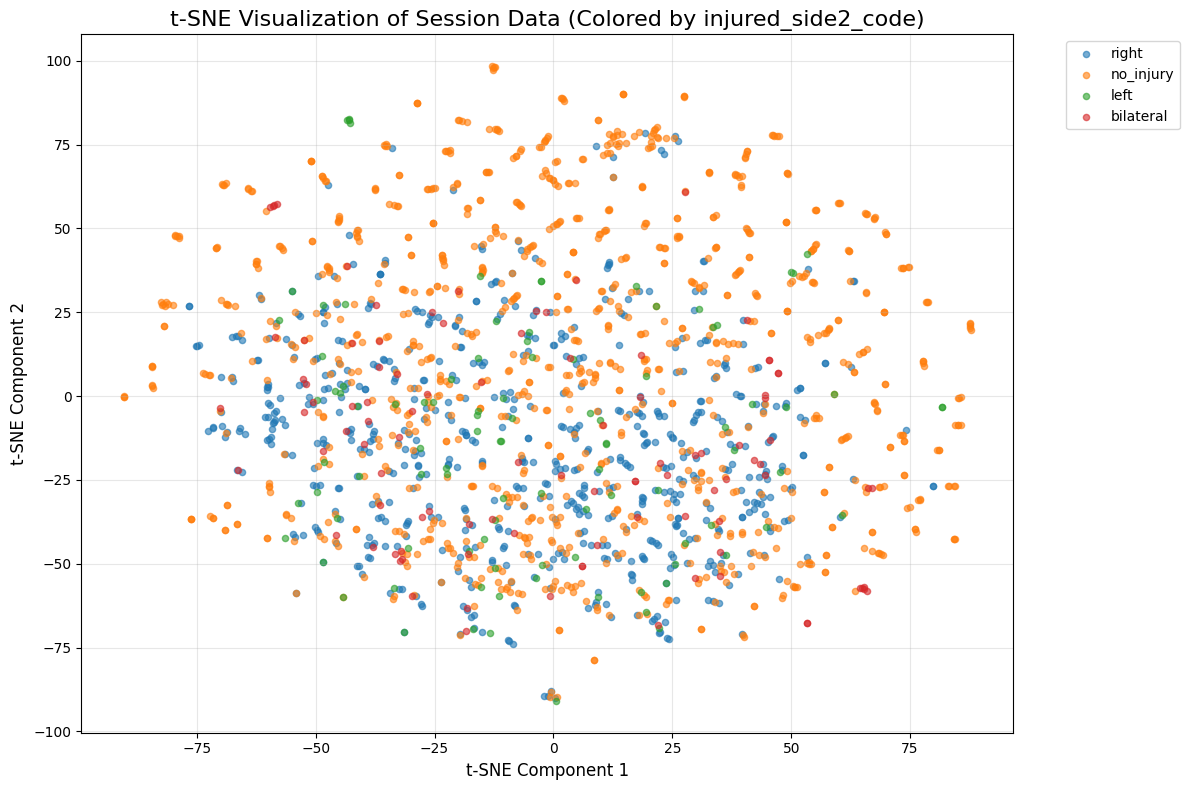

In [15]:
def plot_model_outputs_scatter_by_column(model_output, data, column_name, model_name ,figsize=(12, 8)):
    """
    Create Model Outputs visualization colored by a specific column.
    
    Parameters:
    model_output: Model Outputs array; Expected shape (N,2)
    data: DataFrame containing the column to color by
    column_name: Name of the column to use for coloring
    model_name: Name of the model to use in the label
    figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    
    # Get unique values in the column
    unique_values = data[column_name].dropna().unique()
    
    # Create scatter plot for each unique value
    for value in unique_values:
        mask = data[column_name] == value
        plt.scatter(model_output[mask, 0], model_output[mask, 1], alpha=0.6, s=20, label=str(value))
    
    plt.title(f'{model_name} Visualization of Session Data (Colored by {column_name})', fontsize=16)
    plt.xlabel(f'{model_name} Component 1', fontsize=12)
    plt.ylabel(f'{model_name} Component 2', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot visualizations for different columns
columns_to_plot = [
    "is_injured",
    "injury_severity_code",
    "injury_name",
    "injury2_name",
    "injured_joint_code",
    "injured_joint2_code",
    "injured_side_code",
    "injured_side2_code",
]

for column in columns_to_plot:
    if column in session_data_full.columns:
        plot_model_outputs_scatter_by_column(X_tsne, session_data_full, column, "t-SNE")
    else:
        print(f"Column '{column}' not found in the dataset")


Small group of non-injured samples can be seen, also seems that if we would draw a line in the middle we would have a clasifier slightly better than choosing at random.
Other than that, not much change with previsou iteration.

Let's try with PCA

In [10]:
# Applying PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_


array([0.09292226, 0.09153498])

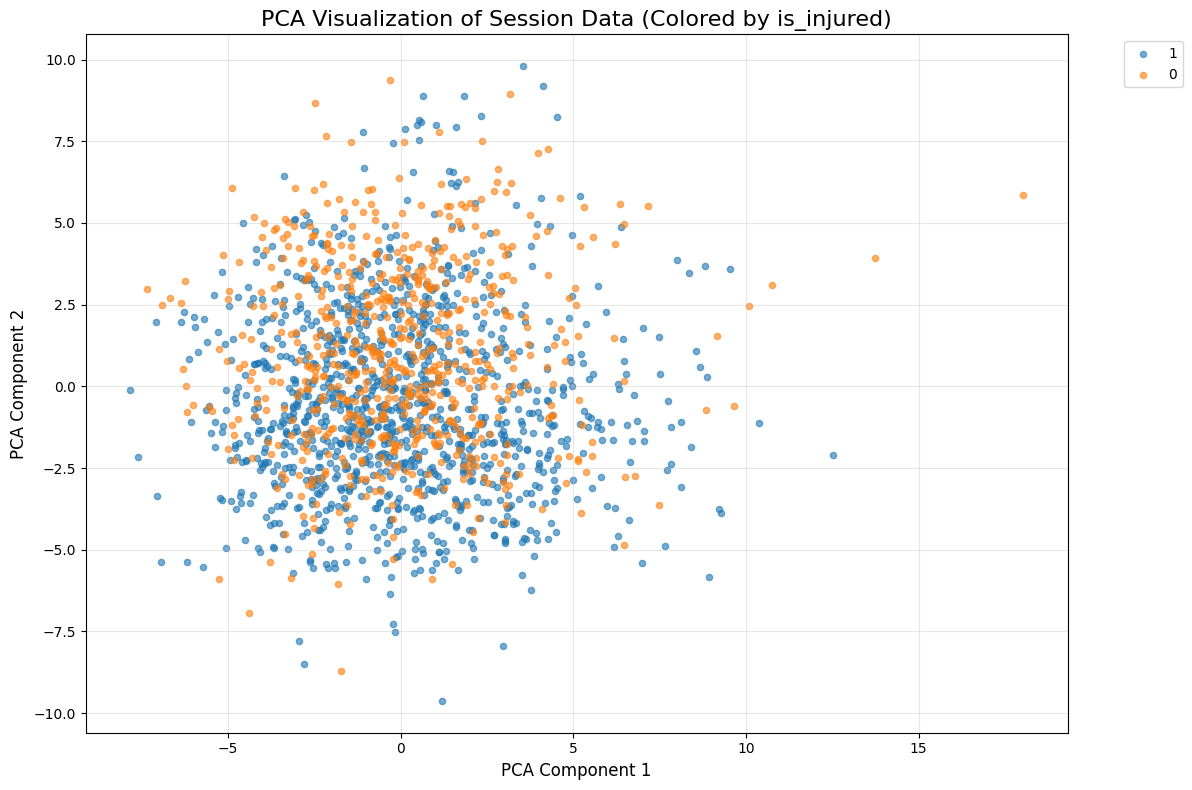

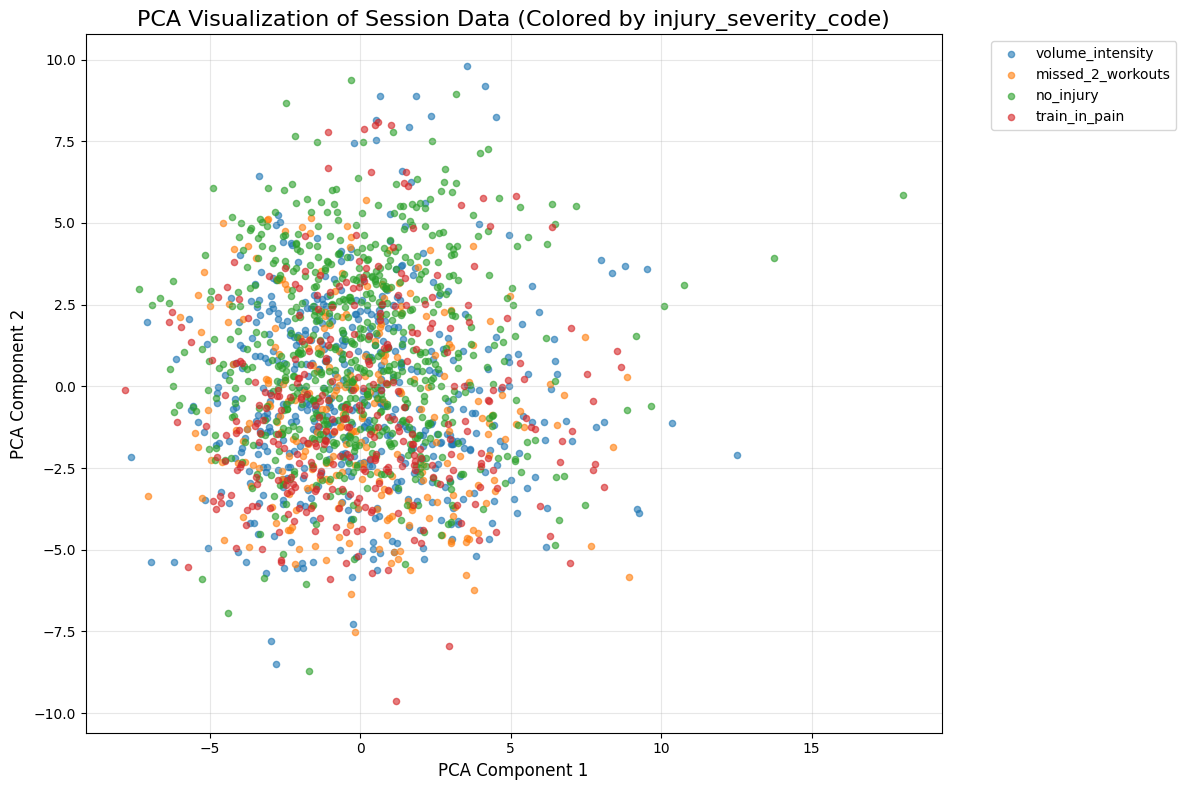

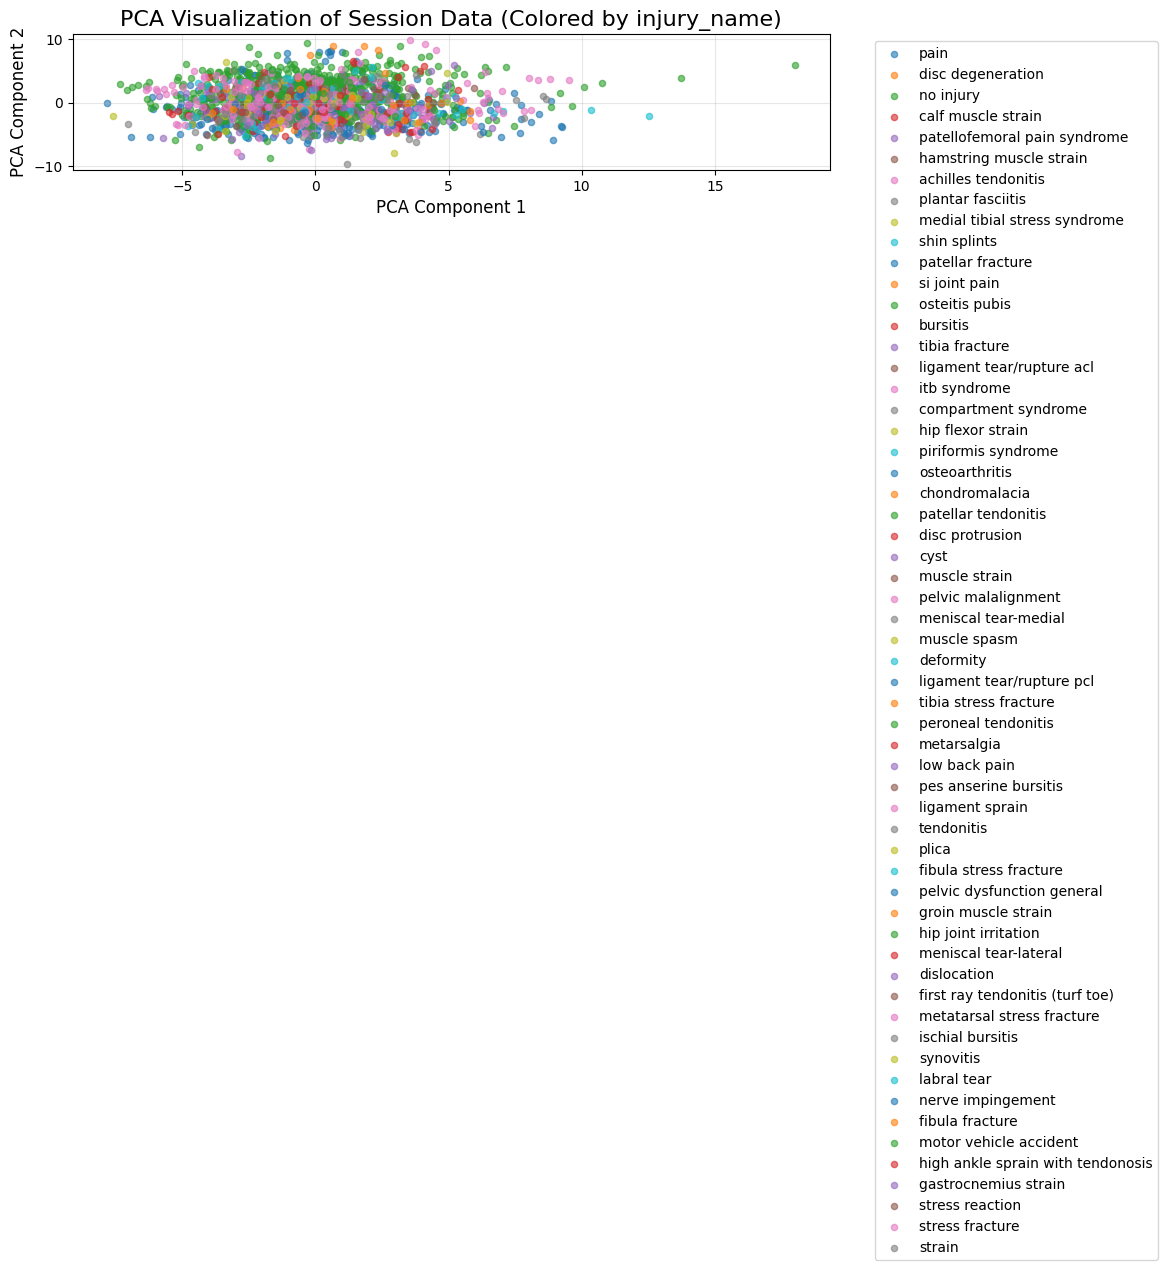

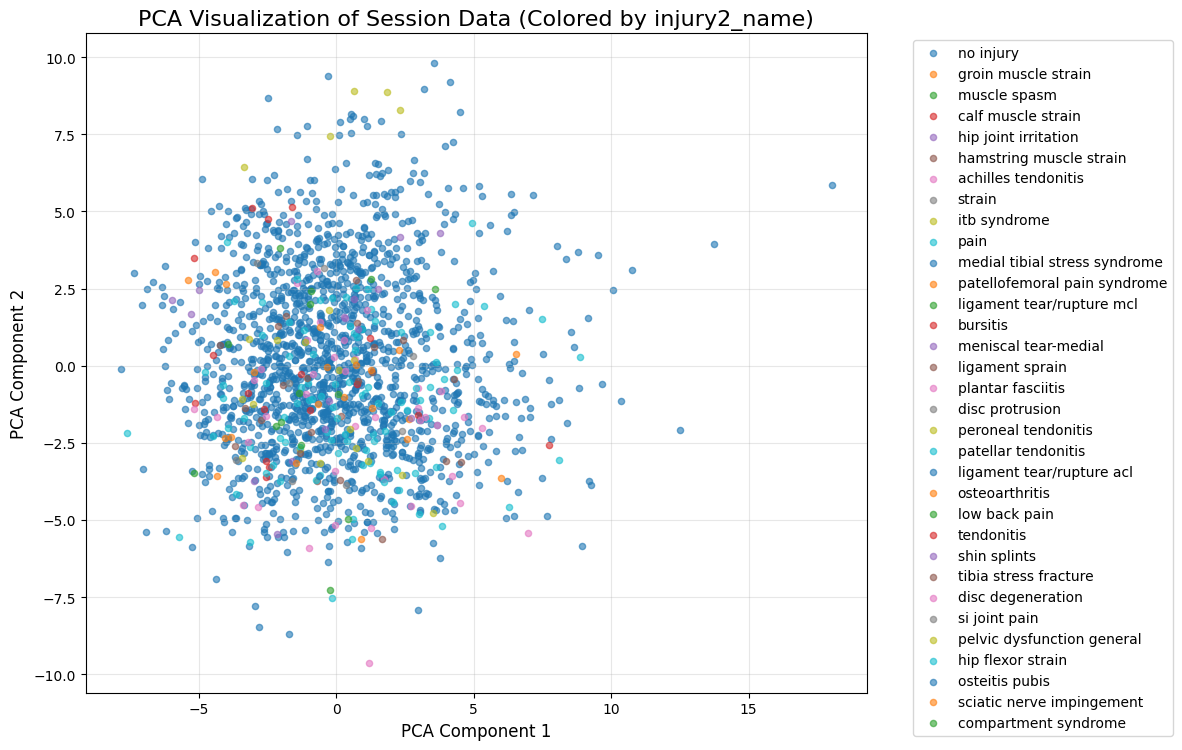

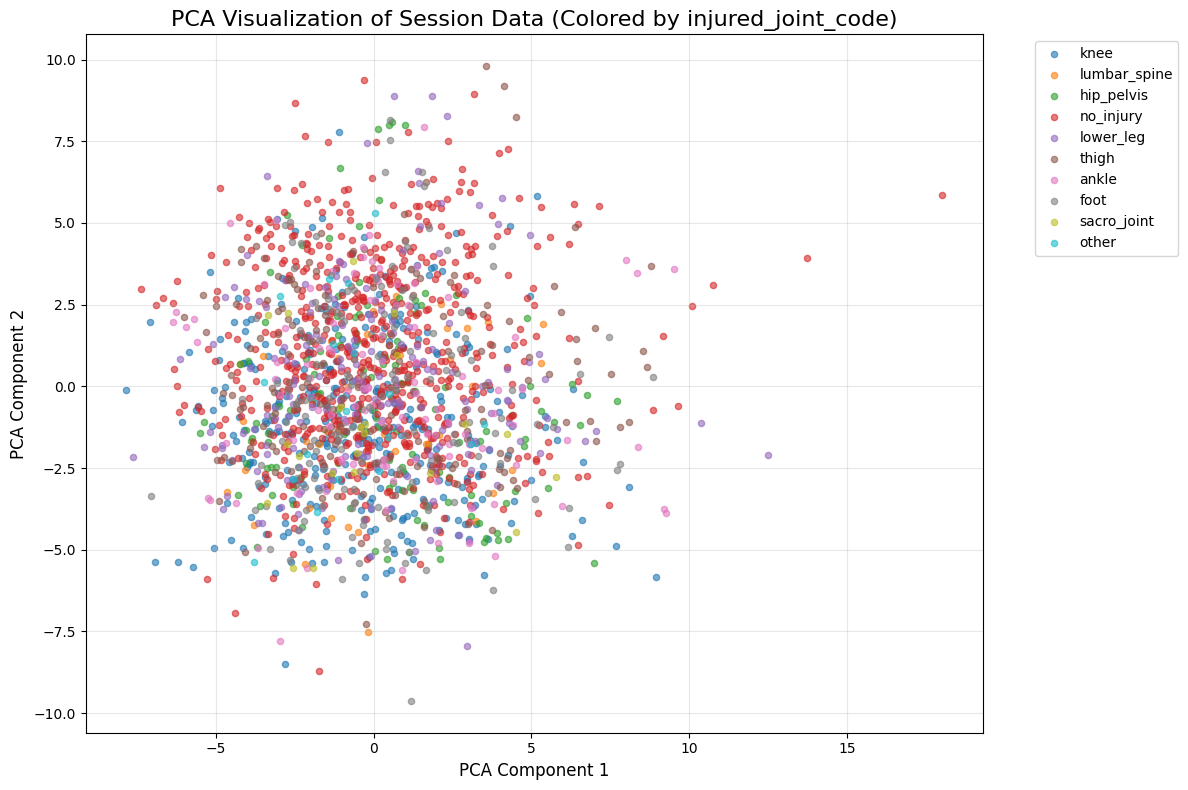

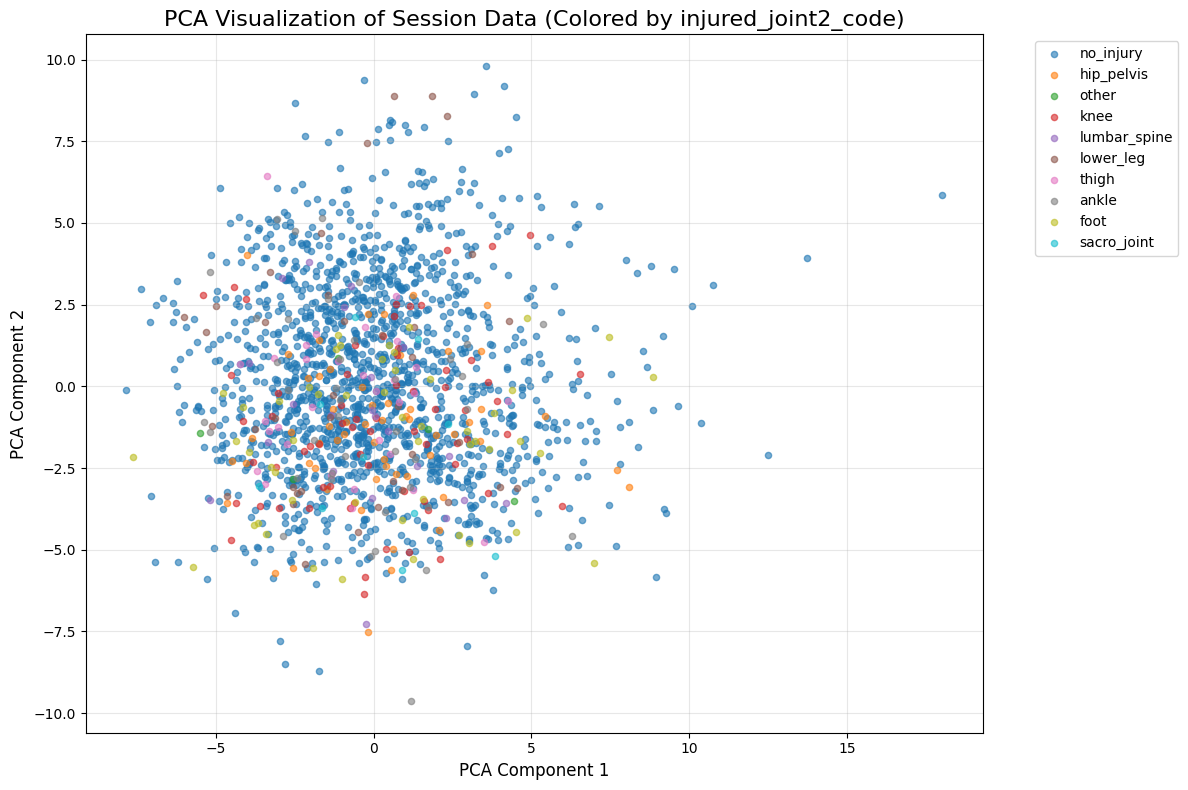

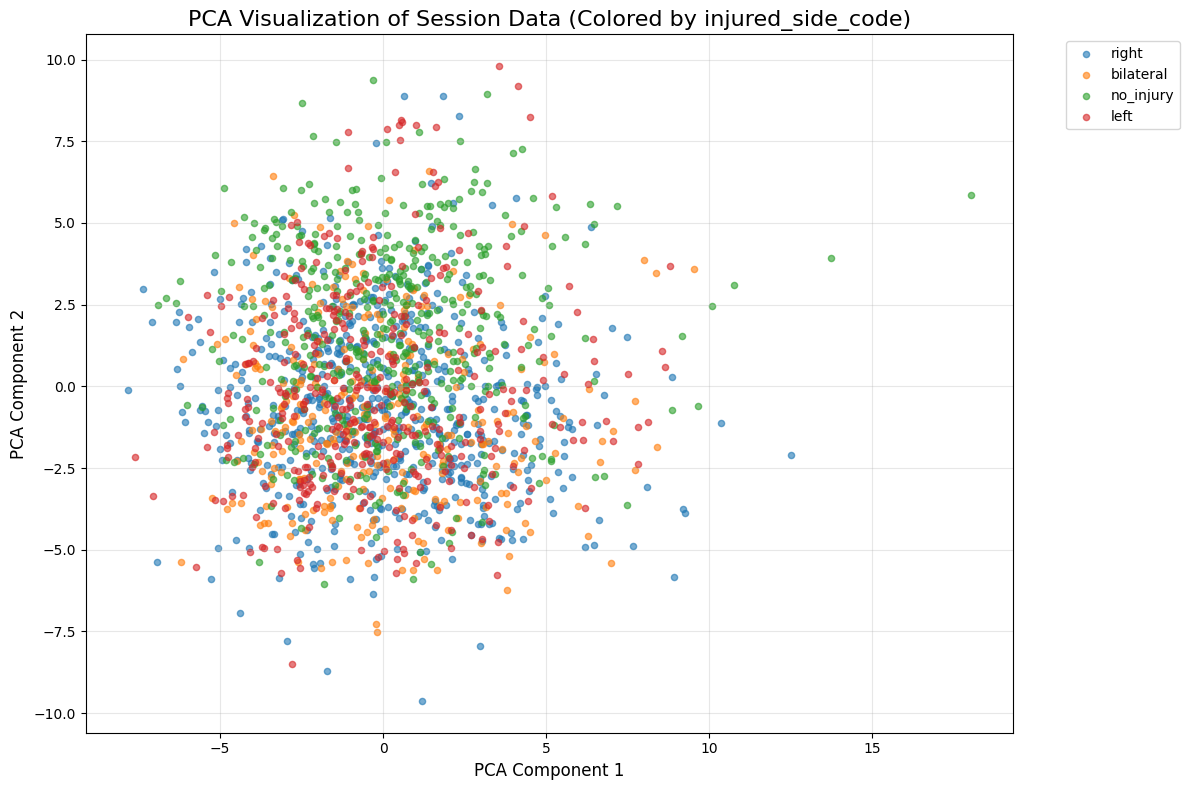

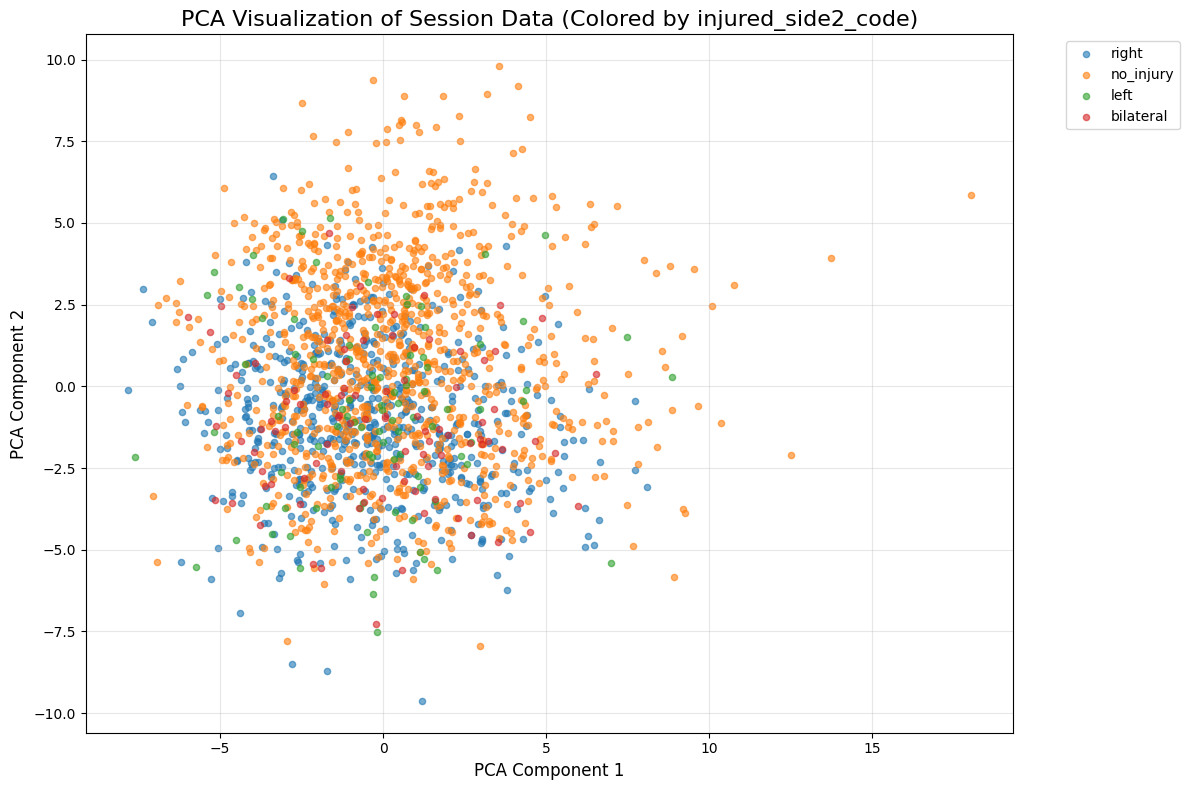

In [11]:
# Plot visualizations for different columns
columns_to_plot = [
    "is_injured",
    "injury_severity_code",
    "injury_name",
    "injury2_name",
    "injured_joint_code",
    "injured_joint2_code",
    "injured_side_code",
    "injured_side2_code",
]

for column in columns_to_plot:
    if column in session_data_full.columns:
        plot_model_outputs_scatter_by_column(X_pca, session_data_full, column, "PCA")
    else:
        print(f"Column '{column}' not found in the dataset")

Now we are going to look at the correlation between is_injured and the rest of the variables:

Top 10 most positively correlated features with is_injured:
r_stance_time            0.222867
l_stance_time            0.218910
r_hip_ext_peak_angle     0.140189
r_ankle_eve_peak_vel     0.139564
l_ankle_eve_peak_vel     0.137646
r_foot_ang_at_hs         0.119876
l_foot_ang_at_hs         0.118026
l_hip_ext_peak_angle     0.117884
l_ankle_eve_excursion    0.109489
l_knee_rot_peak_angle    0.107530
Name: is_injured, dtype: float64

Top 10 most negatively correlated features with is_injured:
r_pelvis_drop_excursion       -0.094219
l_hip_rot_peak_angle          -0.097361
r_stride_rate                 -0.102482
l_stride_rate                 -0.102763
r_knee_abd_peak_angle         -0.111701
r_peak_pelvic_drop_velocity   -0.125055
l_ankle_df_peak_angle         -0.132278
l_stride_length               -0.165498
r_stride_length               -0.165860
speed_r                       -0.186149
Name: is_injured, dtype: float64


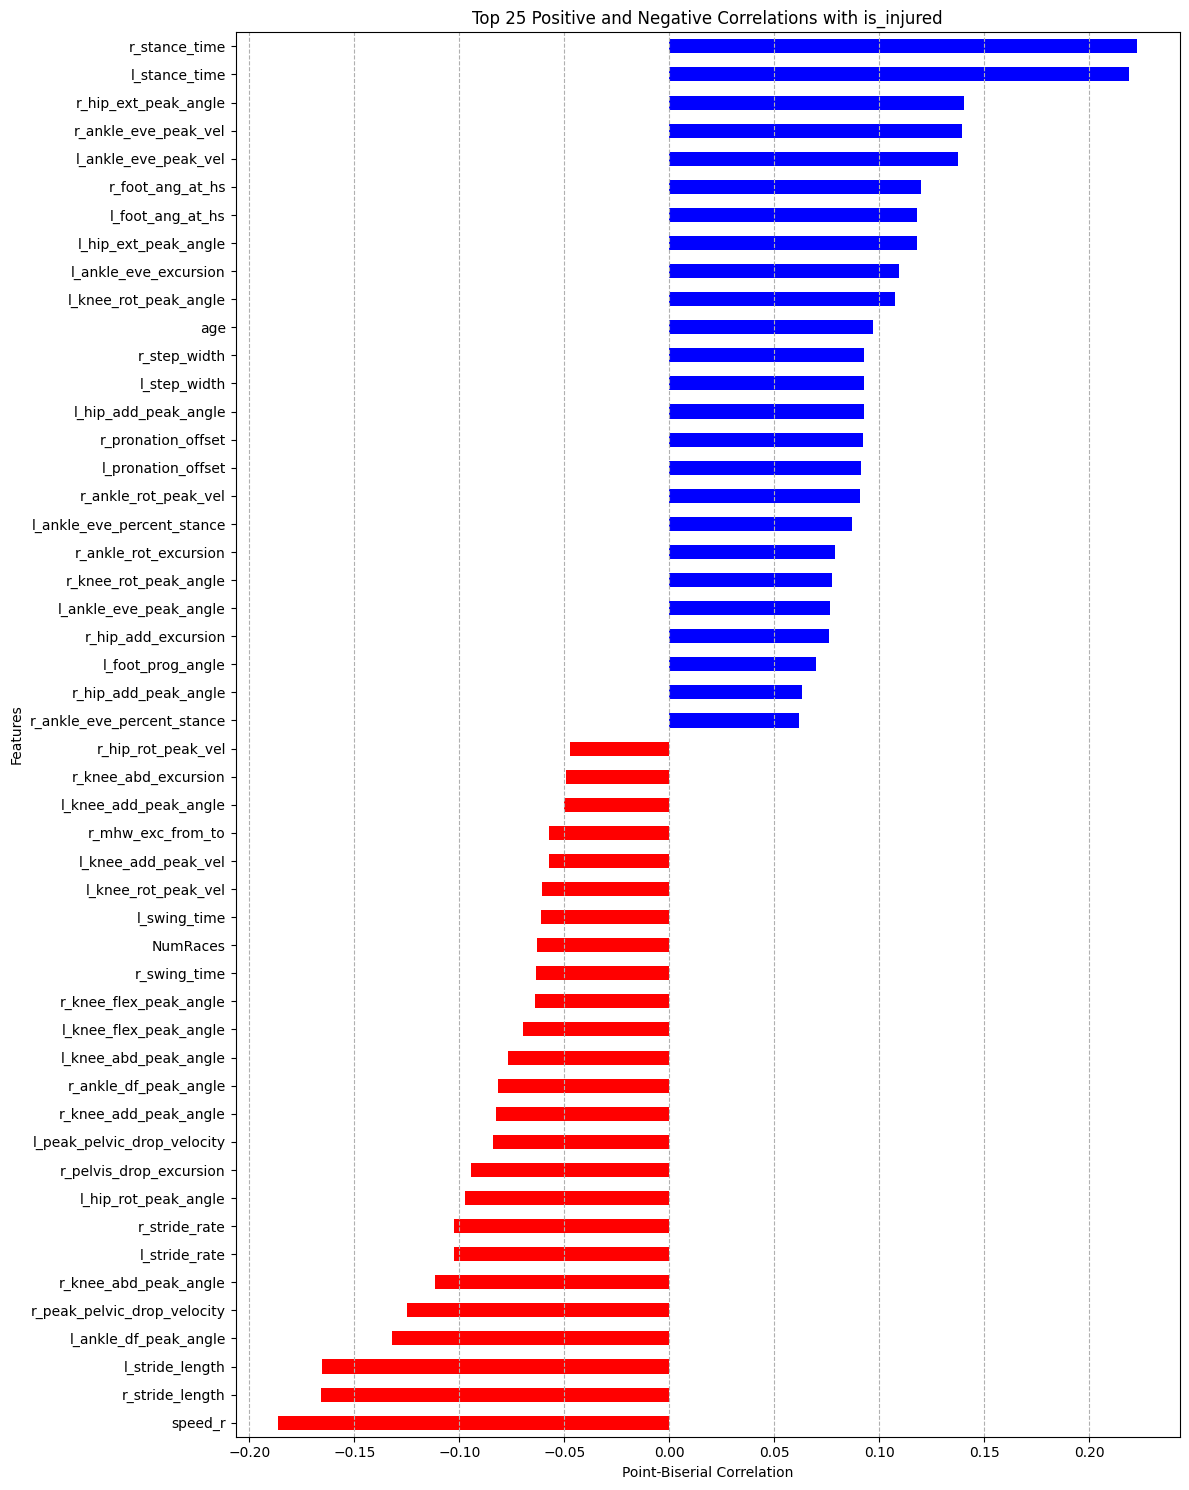

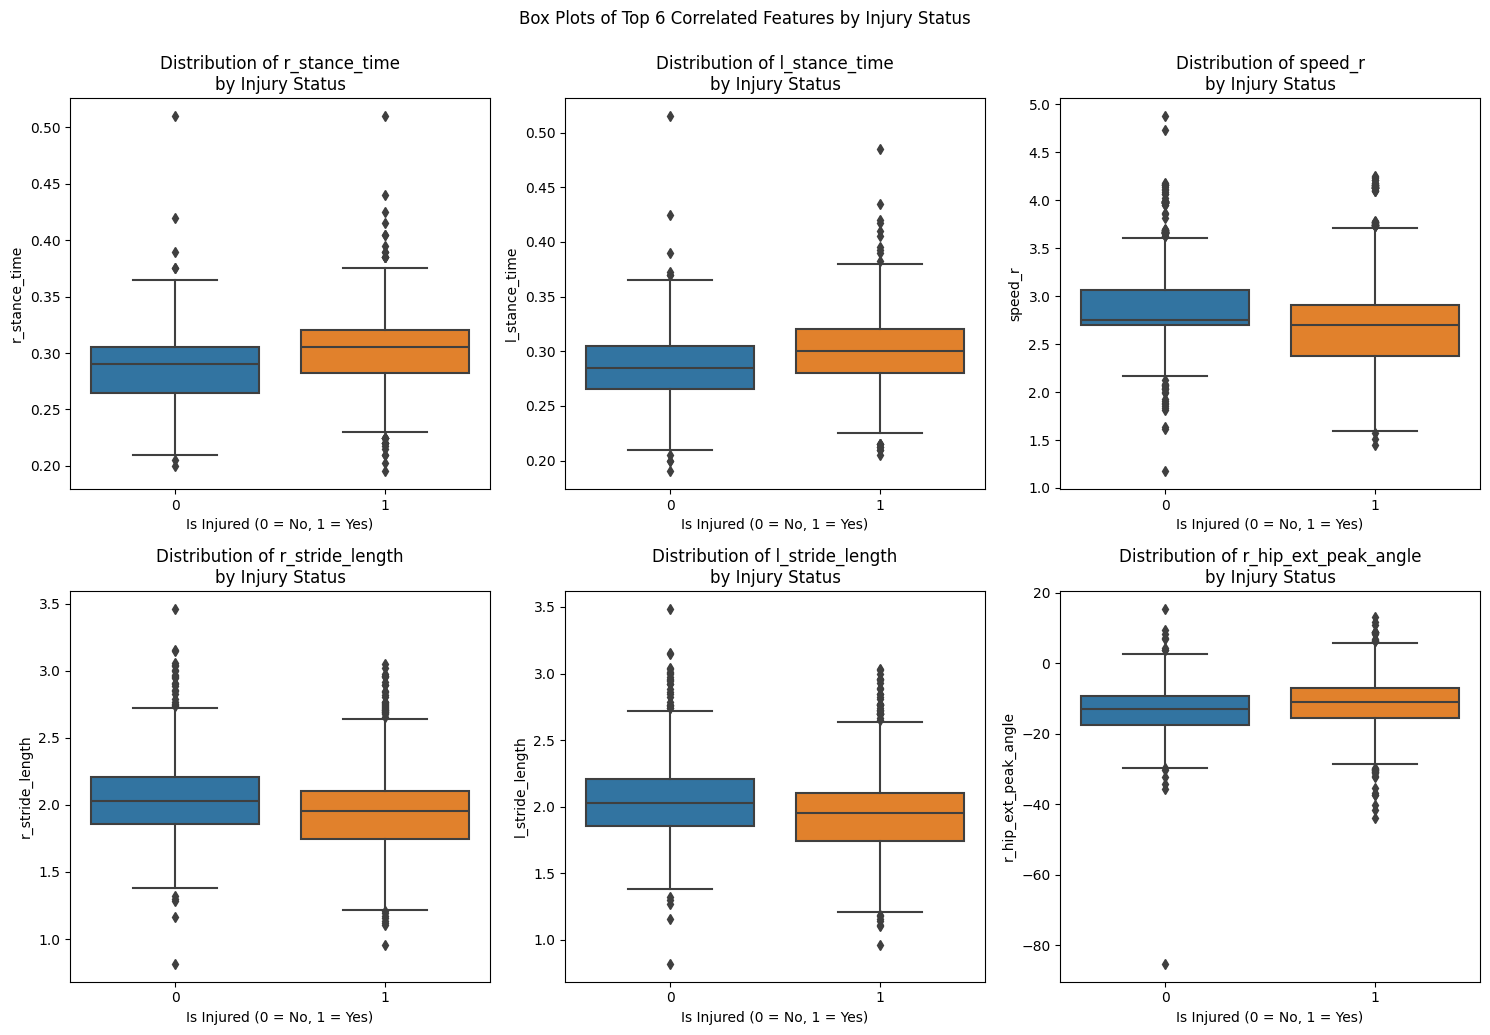

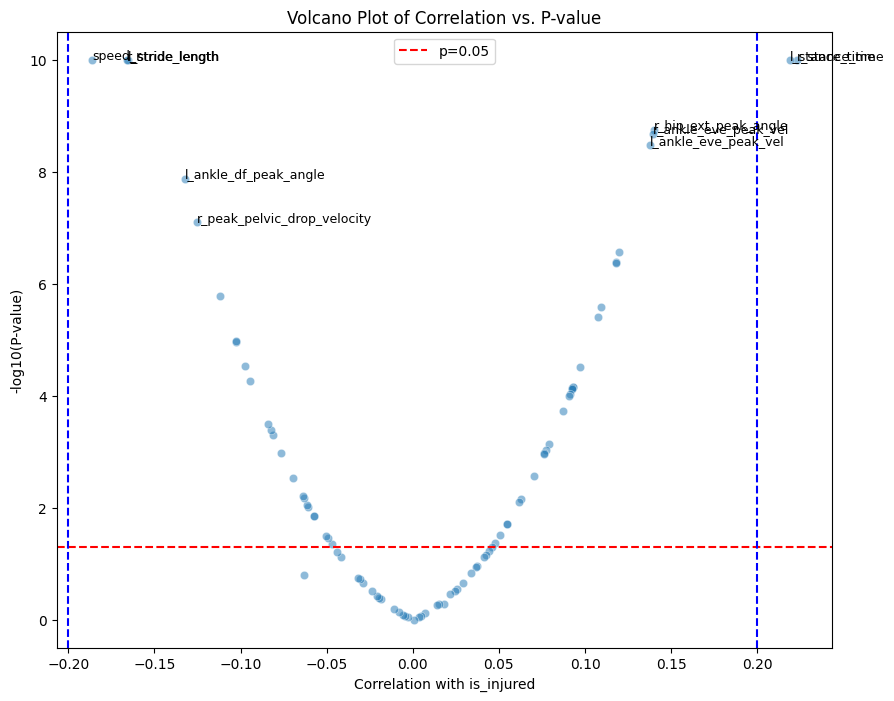


Top 15 features by Mutual Information:
Weight                    0.076500
speed_r                   0.068440
YrsRunning                0.061536
age                       0.038792
Height                    0.031932
l_knee_flex_peak_angle    0.026525
r_hip_add_peak_angle      0.024384
NumRaces                  0.022582
r_foot_ang_at_hs          0.019873
r_step_width              0.019434
l_step_width              0.019434
l_foot_prog_angle         0.018903
r_stance_time             0.018290
r_knee_add_peak_angle     0.018134
l_stride_length           0.017817
Name: MI Scores, dtype: float64


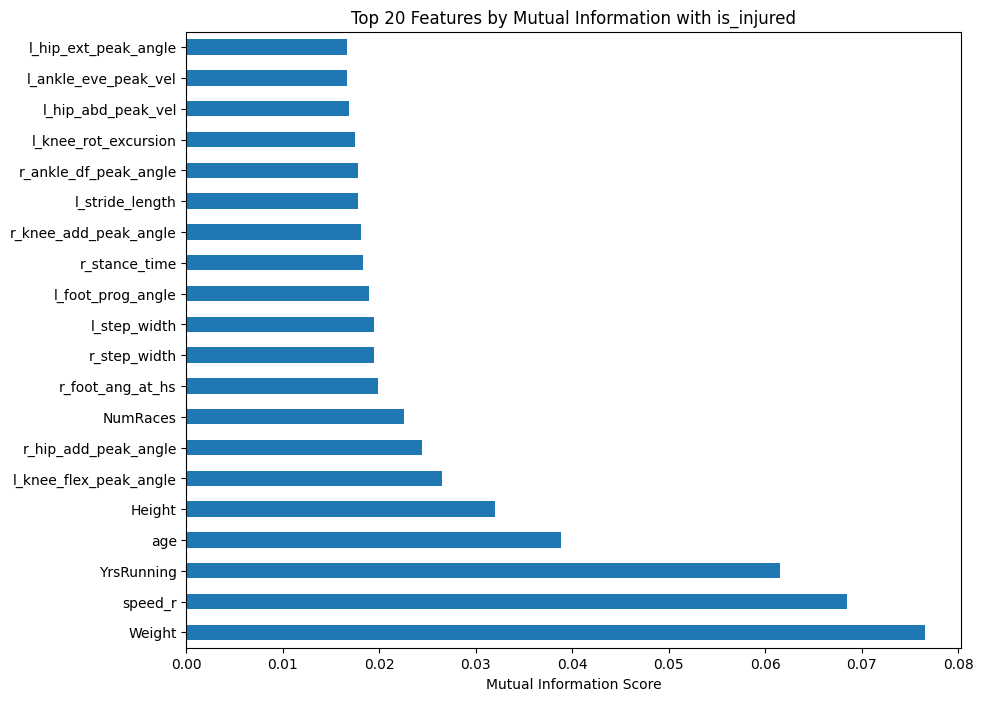


Summary of feature importance (top 20 by absolute correlation):


Correlation  Abs_Correlation       P_Value  \
r_stance_time                   0.222867         0.222867  4.715385e-22   
l_stance_time                   0.218910         0.218910  2.577794e-21   
speed_r                        -0.186149         0.186149  9.558880e-16   
r_stride_length                -0.165860         0.165860  9.077124e-13   
l_stride_length                -0.165498         0.165498  1.018306e-12   
r_hip_ext_peak_angle            0.140189         0.140189  1.680416e-09   
r_ankle_eve_peak_vel            0.139564         0.139564  1.986523e-09   
l_ankle_eve_peak_vel            0.137646         0.137646  3.305597e-09   
l_ankle_df_peak_angle          -0.132278         0.132278  1.324488e-08   
r_peak_pelvic_drop_velocity    -0.125055         0.125055  7.872206e-08   
r_foot_ang_at_hs                0.119876         0.119876  2.661192e-07   
l_foot_ang_at_hs                0.118026         0.118026  4.062743e-07   
l_hip_ext_peak_angle            0.117884         0.117884  4.195136e-07   
r_knee_abd_peak_angle          -0.111701         0.111701  1.645046e-06   
l_ankle_eve_excursion           0.109489         0.109489  2.636670e-06   
l_knee_rot_peak_angle           0.107530         0.107530  3.974549e-06   
l_stride_rate                  -0.102763         0.102763  1.047626e-05   
r_stride_rate                  -0.102482         0.102482  1.107769e-05   
l_hip_rot_peak_angle           -0.097361         0.097361  2.989179e-05   
age                             0.097172         0.097172  3.113435e-05   

                             Mutual_Info  Corr_Rank  MI_Rank  
r_stance_time                   0.018290        1.0     13.0  
l_stance_time                   0.009608        2.0     36.0  
speed_r                         0.068440        3.0      2.0  
r_stride_length                 0.002723        4.0     54.0  
l_stride_length                 0.017817        5.0     15.0  
r_hip_ext_peak_angle            0.005681        6.0     47.0  
r_ankle_eve_peak_vel            0.003072        7.0     53.0  
l_ankle_eve_peak_vel            0.016680        8.0     19.0  
l_ankle_df_peak_angle           0.000000        9.0     71.5  
r_peak_pelvic_drop_velocity     0.012873       10.0     28.0  
r_foot_ang_at_hs                0.019873       11.0      9.0  
l_foot_ang_at_hs                0.013658       12.0     25.0  
l_hip_ext_peak_angle            0.016675       13.0     20.0  
r_knee_abd_peak_angle           0.008631       14.0     38.0  
l_ankle_eve_excursion           0.000000       15.0     71.5  
l_knee_rot_peak_angle           0.012539       16.0     30.0  
l_stride_rate                   0.010137       17.0     35.0  
r_stride_rate                   0.009059       18.0     37.0  
l_hip_rot_peak_angle            0.000000       19.0     71.5  
age                             0.038792       20.0      4.0

In [12]:
# Correlation analysis between features and 'is_injured'

import pandas as pd
from scipy.stats import pointbiserialr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Ensure we are using only numerical features from X
# The 'feature_numerical_columns' variable should be available from previous cells
numerical_X = X[feature_numerical_columns].copy()

# Add 'is_injured' from Y to our numerical dataframe for correlation calculation
df_for_corr = numerical_X.copy()
df_for_corr['is_injured'] = Y['is_injured']

# --- 1. Point-biserial correlation ---
# Pandas .corr() calculates pearson correlation. When one variable is dichotomous (like is_injured)
# and the other is continuous, the pearson correlation is equivalent to the point-biserial correlation.
correlations = df_for_corr.corr(numeric_only=True)['is_injured'].dropna().sort_values(ascending=False)

# Remove the self-correlation of is_injured
correlations = correlations.drop('is_injured')

# Calculate p-values for correlations
p_values = {}
for col in numerical_X.columns:
    # pointbiserialr doesn't handle NaNs, so we drop them for the calculation
    valid_data = df_for_corr[[col, 'is_injured']].dropna()
    if valid_data.shape[0] > 1:
        corr, p = pointbiserialr(valid_data[col], valid_data['is_injured'])
        p_values[col] = p
p_values = pd.Series(p_values)


print("Top 10 most positively correlated features with is_injured:")
print(correlations.head(10))
print("\nTop 10 most negatively correlated features with is_injured:")
print(correlations.tail(10))

# --- 2. Horizontal Bar Plot of Correlations ---
top_25_corr = pd.concat([correlations.head(25), correlations.tail(25)]).sort_values()
plt.figure(figsize=(12, 15))
colors = ['red' if c < 0 else 'blue' for c in top_25_corr.values]
top_25_corr.plot(kind='barh', color=colors)
plt.title('Top 25 Positive and Negative Correlations with is_injured')
plt.xlabel('Point-Biserial Correlation')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

# --- 3. Box plots for top correlated features ---
top_6_features = correlations.abs().nlargest(6).index

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_6_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_injured', y=feature, data=df_for_corr)
    plt.title(f'Distribution of {feature}\nby Injury Status')
    plt.xlabel('Is Injured (0 = No, 1 = Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Box Plots of Top 6 Correlated Features by Injury Status', y=1.03)
plt.show()

# --- 4. Volcano Plot ---
volcano_data = pd.DataFrame({'correlation': correlations, 'p_value': p_values.reindex(correlations.index)}).dropna()
volcano_data['-log10_p_value'] = -np.log10(volcano_data['p_value'] + 1e-10) # Add small constant to avoid log(0)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='correlation', y='-log10_p_value', data=volcano_data, alpha=0.5)
plt.axhline(-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
plt.axvline(0.2, color='b', linestyle='--')
plt.axvline(-0.2, color='b', linestyle='--')
plt.title('Volcano Plot of Correlation vs. P-value')
plt.xlabel('Correlation with is_injured')
plt.ylabel('-log10(P-value)')
plt.legend()
# Label some points
significant_features = volcano_data[volcano_data['p_value'] < 0.05].nlargest(10, '-log10_p_value')
for i, row in significant_features.iterrows():
    plt.text(row['correlation'], row['-log10_p_value'], i, fontsize=9)
plt.show()

# --- 5. Mutual Information ---
# This can capture non-linear relationships.
# We need to handle NaNs for mutual_info_classif by imputing
numerical_X_imputed = numerical_X.fillna(numerical_X.median())
mi_scores = mutual_info_classif(numerical_X_imputed, Y['is_injured'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=numerical_X_imputed.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("\nTop 15 features by Mutual Information:")
print(mi_scores.head(15))

plt.figure(figsize=(10, 8))
mi_scores.head(20).plot(kind='barh')
plt.title('Top 20 Features by Mutual Information with is_injured')
plt.xlabel('Mutual Information Score')
plt.show()

# --- 6. Summary Table ---
summary_df = pd.DataFrame({
    'Correlation': correlations,
    'Abs_Correlation': correlations.abs(),
    'P_Value': p_values,
    'Mutual_Info': mi_scores
}).sort_values('Abs_Correlation', ascending=False).dropna(subset=['Correlation', 'P_Value', 'Mutual_Info'])

summary_df['Corr_Rank'] = summary_df['Abs_Correlation'].rank(ascending=False)
summary_df['MI_Rank'] = summary_df['Mutual_Info'].rank(ascending=False)

print("\nSummary of feature importance (top 20 by absolute correlation):")
from IPython.display import display
with pd.option_context('display.max_rows', 25):
    display(summary_df.head(20))


In [13]:
# Multicollinearity Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from IPython.display import display

# Use the numerical features identified previously and impute missing values
# 'feature_numerical_columns' should be available from a previous cell.
numerical_X = X[feature_numerical_columns].copy()
numerical_X_imputed = numerical_X.fillna(numerical_X.median())

# --- 1. High Correlation Pairs ---
# With many features, a full heatmap is unreadable. Instead, let's list pairs with high correlation.
print("Finding highly correlated feature pairs...")
corr_matrix = numerical_X_imputed.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation greater than 0.8
high_corr_pairs = upper.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.8].sort_values(by='Correlation', ascending=False)

print("\nPairs of features with absolute correlation > 0.8:")
with pd.option_context('display.max_rows', 20):
    display(high_corr_pairs)

# --- 2. Variance Inflation Factor (VIF) ---
# VIF measures how much the variance of an estimated regression coefficient is increased because of multicollinearity.
# A VIF > 10 is often considered a sign of high multicollinearity.
# Note: This can be computationally intensive for many features.

# For VIF calculation, we need to add a constant (intercept) to our data
X_for_vif = sm.add_constant(numerical_X_imputed)

print("\nCalculating VIF... (this may take a moment)")

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(len(X_for_vif.columns))]

# Remove the VIF of the constant, which is not a feature
vif_data = vif_data[vif_data['feature'] != 'const'].sort_values('VIF', ascending=False)

print("\nTop 20 Features by VIF:")
with pd.option_context('display.max_rows', 20):
    display(vif_data.head(20))

save_df_as_table_image(
    vif_data[vif_data['VIF'] > 5],
    os.path.join(c.RICKD_RESULTS_FOLDER, 'vif_session_data_full_features_gt_5.png')
)

print(f"\n{len(vif_data[vif_data['VIF'] > 10])} features have VIF > 10 (High Multicollinearity).")
print(f"{len(vif_data[(vif_data['VIF'] > 5) & (vif_data['VIF'] <= 10)])} features have VIF between 5 and 10 (Moderate Multicollinearity).")

Finding highly correlated feature pairs...

Pairs of features with absolute correlation > 0.8:


Feature 1                    Feature 2  Correlation
534              l_step_width                 r_step_width     1.000000
691           l_stride_length              r_stride_length     0.999814
613             l_stride_rate                r_stride_rate     0.998800
768              l_swing_time                 r_swing_time     0.937379
47                    speed_r              r_stride_length     0.930643
7                     speed_r              l_stride_length     0.930306
2263         l_foot_ang_at_hs             r_foot_ang_at_hs     0.908562
844             l_stance_time                r_stance_time     0.908525
1924     l_hip_ext_peak_angle         r_hip_ext_peak_angle     0.883064
2874   l_vertical_oscillation       r_vertical_oscillation     0.862028
3125  r_pelvis_drop_excursion  r_peak_pelvic_drop_velocity     0.858995
985   l_pelvis_drop_excursion  l_peak_pelvic_drop_velocity     0.857246
1511    l_knee_add_peak_angle        l_knee_abd_peak_angle     0.845961
3331    r_knee_add_peak_angle        r_knee_abd_peak_angle     0.820276


Calculating VIF... (this may take a moment)


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Top 20 Features by VIF:


feature           VIF
47           r_step_width           inf
7            l_step_width           inf
49        r_stride_length  7.706292e+04
9         l_stride_length  7.702024e+04
8           l_stride_rate  1.213412e+04
48          r_stride_rate  1.201502e+04
23  l_knee_abd_peak_angle  9.250087e+02
21  l_knee_add_peak_angle  8.193304e+02
63  r_knee_abd_peak_angle  8.123570e+02
61  r_knee_add_peak_angle  5.887614e+02
1                 speed_r  3.558583e+02
64   r_knee_abd_excursion  3.439020e+02
24   l_knee_abd_excursion  3.351409e+02
22   l_knee_add_excursion  2.184873e+02
50           r_swing_time  1.686978e+02
10           l_swing_time  1.552698e+02
62   r_knee_add_excursion  1.384573e+02
51          r_stance_time  1.163715e+02
11          l_stance_time  1.088047e+02
35   l_ankle_eve_peak_vel  2.757786e+01


33 features have VIF > 10 (High Multicollinearity).
19 features have VIF between 5 and 10 (Moderate Multicollinearity).
